목표 : 수익률 계산
===============
if label == 0: # 변동성 하락

    → 양매도
elif label == 1: # 변동성 상승

    → 양매수

# import modules & load files

import modules

In [1514]:
import pandas as pd
import numpy as np
import math
import glob
import datetime
import warnings
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')
warnings.filterwarnings('ignore')
import os
current_directory = os.getcwd()
print("현재 디렉토리:", current_directory)

현재 디렉토리: c:\apps\Project1


## load files

strike price set

In [1515]:
# strike price set
CTB09sp = pd.read_csv('./target_price_set/CTB09sp.csv', index_col=0)
CTB15sp = pd.read_csv('./target_price_set/CTB15sp.csv', index_col=0)
PTB09sp = pd.read_csv('./target_price_set/PTB09sp.csv', index_col=0)
PTB15sp = pd.read_csv('./target_price_set/PTB15sp.csv', index_col=0)

In [1516]:
CTB15sp

,기준행사가,S-4,S-3,S-2,S-1,S+1,S+2,S+3,S+4
날짜,,,,,,,,,
2023-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-07,3.66,NaN,NaN,NaN,NaN,2.30,1.36,0.75,0.39
2023-11-06,4.01,12.95,8.46,7.52,5.61,2.70,1.71,0.93,0.59
2023-11-03,3.12,11.25,8.90,6.71,4.76,1.86,0.98,0.46,0.19
2023-11-02,2.87,10.45,8.21,6.15,4.41,1.79,1.00,0.51,0.24
2023-11-01,4.76,12.90,10.45,8.36,6.46,3.35,2.23,1.39,0.80
2023-10-31,4.37,NaN,9.40,7.55,5.93,3.07,2.08,1.30,0.78
2023-10-30,5.21,13.20,10.65,8.70,6.81,3.80,2.66,1.78,1.11
2023-10-27,5.13,NaN,10.35,8.39,6.66,3.81,2.71,1.85,1.19


In [1517]:
PTB09sp

,기준행사가,S-4,S-3,S-2,S-1,S+1,S+2,S+3,S+4
날짜,,,,,,,,,
2023-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-07,1.19,0.13,0.22,0.40,0.69,1.95,3.06,4.54,6.38
2023-11-06,8.81,1.78,3.01,4.60,6.59,11.30,13.65,15.70,19.35
2023-11-03,2.87,0.32,0.59,1.00,1.80,4.30,6.11,8.20,9.76
2023-11-02,2.69,0.38,0.64,1.07,1.66,4.00,5.66,7.60,9.60
2023-11-01,2.43,0.44,0.70,1.09,1.65,3.50,5.30,6.50,8.34
2023-10-31,1.95,NaN,0.61,0.92,1.35,2.76,3.80,6.31,6.65
2023-10-30,4.15,1.23,1.71,2.33,3.13,5.40,7.14,8.60,10.30
2023-10-27,4.18,1.35,1.82,2.43,3.21,5.36,7.06,8.38,10.30


In [1518]:
PTB15sp

,기준행사가,S-4,S-3,S-2,S-1,S+1,S+2,S+3,S+4
날짜,,,,,,,,,
2023-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-07,1.52,0.11,0.23,0.47,0.92,2.57,4.03,5.91,7.92
2023-11-06,2.50,0.43,0.66,1.05,1.63,3.74,5.45,6.52,10.75
2023-11-03,2.14,0.19,0.37,0.66,1.26,3.41,5.04,7.05,9.43
2023-11-02,3.08,0.42,0.73,1.23,1.85,4.52,6.20,8.15,10.55
2023-11-01,2.36,0.41,0.66,1.03,1.58,3.41,4.86,6.37,8.26
2023-10-31,3.53,NaN,1.24,1.79,2.54,4.76,6.27,7.84,10.05
2023-10-30,3.19,0.84,1.20,1.69,2.34,4.26,5.75,7.09,8.50
2023-10-27,3.99,1.23,1.69,2.28,3.04,5.14,6.63,8.23,10.05


before label

In [1519]:
# before label
VKOSPI_Label = pd.read_csv('./dataset/VKOSPI_Label.csv', index_col=0)
VKOSPI_Label[['cost', 'revenue', 'profit', 'return']] = 0
# VKOSPI_Label.set_index('날짜', inplace=True)
VKOSPI_Label

,VKOSPI_Label,cost,revenue,profit,return
날짜,,,,,
2023-10-10,1,0,0,0,0
2023-10-11,0,0,0,0,0
2023-10-12,0,0,0,0,0
2023-10-13,0,0,0,0,0
2023-10-16,1,0,0,0,0
2023-10-17,0,0,0,0,0
2023-10-18,0,0,0,0,0
2023-10-19,1,0,0,0,0
2023-10-20,1,0,0,0,0


In [1520]:
VKOSPI_Label.index

Index(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
       '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
       '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
       '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object', name='날짜')

In [1521]:
VKOSPI_Label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2023-10-10 to 2023-11-03
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   VKOSPI_Label  19 non-null     int64
 1   cost          19 non-null     int64
 2   revenue       19 non-null     int64
 3   profit        19 non-null     int64
 4   return        19 non-null     int64
dtypes: int64(5)
memory usage: 912.0+ bytes


new label

In [1522]:
new = pd.read_csv('./dataset/test_features.csv', index_col=0)[['VKOSPI_Label']]

In [1523]:
new[['cost', 'revenue', 'profit', 'return']] = 0

In [1524]:
new

,VKOSPI_Label,cost,revenue,profit,return
2023-10-10,1,0,0,0,0
2023-10-11,0,0,0,0,0
2023-10-12,0,0,0,0,0
2023-10-13,0,0,0,0,0
2023-10-16,0,0,0,0,0
2023-10-17,0,0,0,0,0
2023-10-18,0,0,0,0,0
2023-10-19,1,0,0,0,0
2023-10-20,1,0,0,0,0
2023-10-23,0,0,0,0,0


In [1525]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2023-10-10 to 2023-11-03
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   VKOSPI_Label  19 non-null     int64
 1   cost          19 non-null     int64
 2   revenue       19 non-null     int64
 3   profit        19 non-null     int64
 4   return        19 non-null     int64
dtypes: int64(5)
memory usage: 912.0+ bytes


In [1526]:
new.index

Index(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
       '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
       '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
       '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object')

predict

In [1527]:
predict = pd.DataFrame([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], columns=['predict'], index=new.index)

In [1528]:
predict[['cost', 'revenue', 'profit', 'return']] = 0
predict

,predict,cost,revenue,profit,return
2023-10-10,1,0,0,0,0
2023-10-11,0,0,0,0,0
2023-10-12,0,0,0,0,0
2023-10-13,0,0,0,0,0
2023-10-16,0,0,0,0,0
2023-10-17,0,0,0,0,0
2023-10-18,0,0,0,0,0
2023-10-19,0,0,0,0,0
2023-10-20,1,0,0,0,0
2023-10-23,1,0,0,0,0


In [1529]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2023-10-10 to 2023-11-03
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   predict  19 non-null     int64
 1   cost     19 non-null     int64
 2   revenue  19 non-null     int64
 3   profit   19 non-null     int64
 4   return   19 non-null     int64
dtypes: int64(5)
memory usage: 912.0+ bytes


In [1530]:
predict.index

Index(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
       '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
       '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
       '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object')

benchmark kospi200

In [1531]:
ks200 = pd.read_csv('./dataset/data/KOSPI200.csv')

In [1532]:
ks200['날짜'] = pd.to_datetime(ks200['날짜'], format="%Y- %m- %d")

In [1533]:
ks200.set_index('날짜', inplace=True)
ks200.sort_index(inplace=True)

In [1534]:
ks200['변동 %'] = ks200['변동 %'].str.rstrip('%').astype(float)

In [1535]:
ks200

,종가,시가,고가,저가,거래량,변동 %
날짜,,,,,,
2022-10-13,282.57,286.27,286.36,282.57,133.29M,-1.57
2022-10-14,289.36,287.59,290.32,286.59,132.07M,2.40
2022-10-17,289.57,285.89,290.04,284.91,111.60M,0.07
2022-10-18,293.59,293.34,293.78,289.77,117.12M,1.39
2022-10-19,291.29,293.41,295.34,290.90,110.85M,-0.78
...,...,...,...,...,...,...
2023-11-02,315.16,314.59,316.51,314.12,112.38M,1.76
2023-11-03,318.24,317.96,318.76,316.50,89.97M,0.98
2023-11-06,334.16,322.62,334.16,321.57,174.43M,5.00


In [1536]:
ks200.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2022-10-13 to 2023-11-08
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      266 non-null    float64
 1   시가      266 non-null    float64
 2   고가      266 non-null    float64
 3   저가      266 non-null    float64
 4   거래량     266 non-null    object 
 5   변동 %    266 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.5+ KB


In [1537]:
ks200.index

DatetimeIndex(['2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-26',
               ...
               '2023-10-26', '2023-10-27', '2023-10-30', '2023-10-31',
               '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08'],
              dtype='datetime64[ns]', name='날짜', length=266, freq=None)

기간조정

In [1538]:
start_date = pd.to_datetime("2023-10-10")
end_date = pd.to_datetime("2023-11-03")
ks200 = ks200.loc[start_date:end_date]
ks200.index = ks200.index.to_series().apply(lambda x: x.strftime('%Y-%m-%d'))

In [1539]:
ks200.index

Index(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
       '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
       '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
       '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object', name='날짜')

In [1540]:
ks200['return_cumprod'] = (ks200['변동 %'] / 100 + 1).cumprod() *100

In [1541]:
ks200

,종가,시가,고가,저가,거래량,변동 %,return_cumprod
날짜,,,,,,,
2023-10-10,319.11,322.97,324.85,319.06,128.82M,0.05,100.050000
2023-10-11,324.74,323.96,327.26,323.95,119.11M,1.76,101.810880
2023-10-12,328.85,326.89,328.85,326.89,108.82M,1.27,103.103878
2023-10-13,325.77,326.11,327.33,325.43,91.78M,-0.94,102.134702
2023-10-16,323.29,324.10,326.00,321.32,93.10M,-0.76,101.358478
2023-10-17,327.35,325.70,328.26,325.01,88.46M,1.26,102.635595
2023-10-18,328.82,326.32,329.06,326.12,134.13M,0.45,103.097455
2023-10-19,322.76,324.75,325.08,322.40,115.71M,-1.84,101.200462
2023-10-20,317.96,319.45,320.18,316.28,112.71M,-1.49,99.692575


# 양매도, 양매수 스트래들

new label

In [1542]:
for d in new.index:    
    if new.loc[d, 'VKOSPI_Label'] == 0: # 변동성 하락 양매도 스트랭글
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            new['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            new['revenue'].loc[d] = revenue # 15시 값 합
            new['profit'].loc[d] = cost - revenue
            new['return'].loc[d] = (cost - revenue) / revenue
        except:     
            new['cost'].loc[d] = np.nan
            new['revenue'].loc[d] = np.nan 
            new['profit'].loc[d] = np.nan 
            new['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            new['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            new['revenue'].loc[d] = revenue
            new['profit'].loc[d] = revenue - cost
            new['return'].loc[d] = (revenue - cost) / cost
        except:
            new['cost'].loc[d] = np.nan
            new['revenue'].loc[d] = np.nan
            new['profit'].loc[d] = np.nan
            new['return'].loc[d] = np.nan

In [1543]:
new

,VKOSPI_Label,cost,revenue,profit,return
2023-10-10,1,NaN,18.04,NaN,NaN
2023-10-11,0,17.87,NaN,NaN,NaN
2023-10-12,0,17.01,16.77,0.24,0.014311
2023-10-13,0,16.73,16.59,0.14,0.008439
2023-10-16,0,16.70,16.57,0.13,0.007846
2023-10-17,0,15.64,15.92,-0.28,-0.017588
2023-10-18,0,16.05,15.68,0.37,0.023597
2023-10-19,1,16.10,16.42,0.32,0.019876
2023-10-20,1,16.80,17.06,0.26,0.015476
2023-10-23,0,17.10,16.40,0.70,0.042683


In [1544]:
new['return_cumprod'] = (new['return'] + 1).cumprod() * 100

In [1545]:
new

,VKOSPI_Label,cost,revenue,profit,return,return_cumprod
2023-10-10,1,NaN,18.04,NaN,NaN,NaN
2023-10-11,0,17.87,NaN,NaN,NaN,NaN
2023-10-12,0,17.01,16.77,0.24,0.014311,101.431127
2023-10-13,0,16.73,16.59,0.14,0.008439,102.287086
2023-10-16,0,16.70,16.57,0.13,0.007846,103.089580
2023-10-17,0,15.64,15.92,-0.28,-0.017588,101.276446
2023-10-18,0,16.05,15.68,0.37,0.023597,103.666260
2023-10-19,1,16.10,16.42,0.32,0.019876,105.726708
2023-10-20,1,16.80,17.06,0.26,0.015476,107.362954
2023-10-23,0,17.10,16.40,0.70,0.042683,111.945520


In [1546]:
new['profit'].sum()

2.8000000000000025

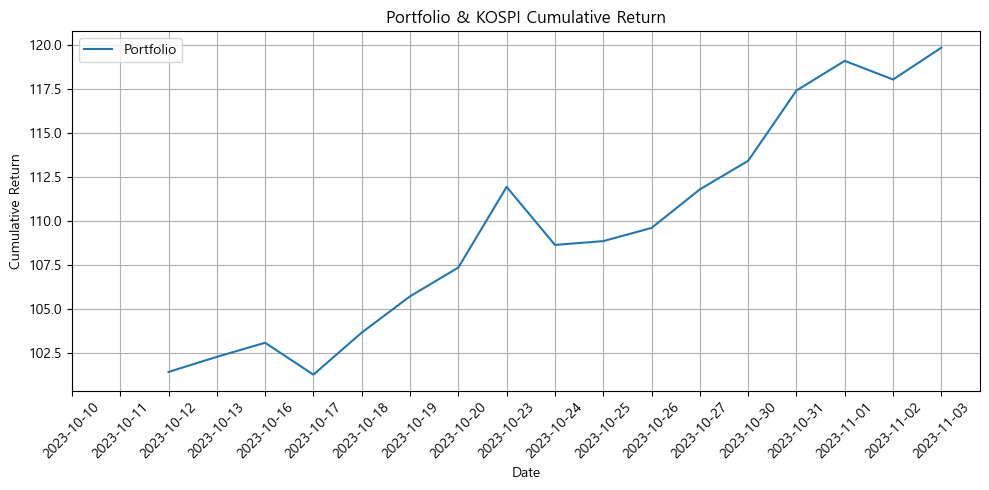

In [1547]:
# 포트폴리오 누적수익률 그래프
plt.figure(figsize=(10, 5))
plt.plot(new.index, new['return_cumprod'], label='Portfolio')
# plt.plot(new.index, new['return'], label='KOSPI')

# x축 레이블을 날짜로 설정합니다.
plt.xticks(new.index[::int(len(new.index)/10)], rotation=45)

plt.title('Portfolio & KOSPI Cumulative Return')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

old label

In [1548]:
for d in VKOSPI_Label.index:    
    if VKOSPI_Label.loc[d, 'VKOSPI_Label'] == 0: # 변동성 하락 양매도 스트랭글
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            VKOSPI_Label['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            VKOSPI_Label['revenue'].loc[d] = revenue # 15시 값 합
            VKOSPI_Label['profit'].loc[d] = cost - revenue
            VKOSPI_Label['return'].loc[d] = (cost - revenue) / revenue
        except:     
            VKOSPI_Label['cost'].loc[d] = np.nan
            VKOSPI_Label['revenue'].loc[d] = np.nan 
            VKOSPI_Label['profit'].loc[d] = np.nan 
            VKOSPI_Label['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승| 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            VKOSPI_Label['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            VKOSPI_Label['revenue'].loc[d] = revenue
            VKOSPI_Label['profit'].loc[d] = revenue - cost
            VKOSPI_Label['return'].loc[d] = (revenue - cost) / cost
        except:
            VKOSPI_Label['cost'].loc[d] = np.nan
            VKOSPI_Label['revenue'].loc[d] = np.nan
            VKOSPI_Label['profit'].loc[d] = np.nan
            VKOSPI_Label['return'].loc[d] = np.nan

In [1549]:
VKOSPI_Label['return_cumprod'] = (VKOSPI_Label['return'] + 1).cumprod() * 100

In [1550]:
VKOSPI_Label

,VKOSPI_Label,cost,revenue,profit,return,return_cumprod
날짜,,,,,,
2023-10-10,1,NaN,18.04,NaN,NaN,NaN
2023-10-11,0,17.87,NaN,NaN,NaN,NaN
2023-10-12,0,17.01,16.77,0.24,0.014311,101.431127
2023-10-13,0,16.73,16.59,0.14,0.008439,102.287086
2023-10-16,1,16.70,16.57,-0.13,-0.007784,101.490839
2023-10-17,0,15.64,15.92,-0.28,-0.017588,99.705824
2023-10-18,0,16.05,15.68,0.37,0.023597,102.058577
2023-10-19,1,16.10,16.42,0.32,0.019876,104.087070
2023-10-20,1,16.80,17.06,0.26,0.015476,105.697941


In [1551]:
VKOSPI_Label['profit'].sum()

1.8800000000000008

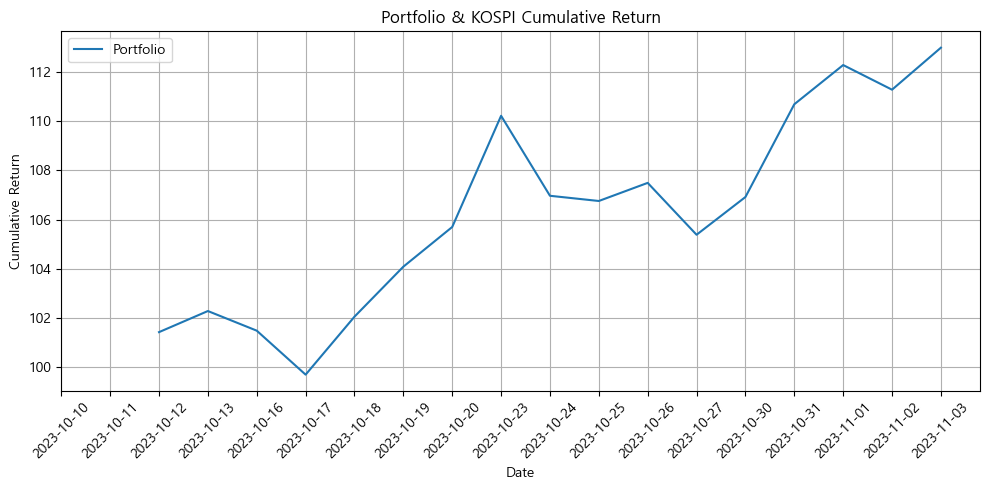

In [1552]:
# 포트폴리오 누적수익률 그래프
plt.figure(figsize=(10, 5))
plt.plot(VKOSPI_Label.index, VKOSPI_Label['return_cumprod'], label='Portfolio')
# plt.plot(VKOSPI_Label.index, VKOSPI_Label['return'], label='KOSPI')

# x축 레이블을 날짜로 설정합니다.
plt.xticks(VKOSPI_Label.index[::int(len(VKOSPI_Label.index)/10)], rotation=45)

plt.title('Portfolio & KOSPI Cumulative Return')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

predict

In [1553]:
for d in predict.index:    
    if predict.loc[d, 'predict'] == 0: # 변동성 하락 양매도 스트랭글
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            predict['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            predict['revenue'].loc[d] = revenue # 15시 값 합
            predict['profit'].loc[d] = cost - revenue
            predict['return'].loc[d] = (cost - revenue) / revenue
        except:     
            predict['cost'].loc[d] = np.nan
            predict['revenue'].loc[d] = np.nan 
            predict['profit'].loc[d] = np.nan 
            predict['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            predict['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            predict['revenue'].loc[d] = revenue
            predict['profit'].loc[d] = revenue - cost
            predict['return'].loc[d] = (revenue - cost) / cost
        except:
            predict['cost'].loc[d] = np.nan
            predict['revenue'].loc[d] = np.nan
            predict['profit'].loc[d] = np.nan
            predict['return'].loc[d] = np.nan

In [1554]:
predict

,predict,cost,revenue,profit,return
2023-10-10,1,NaN,18.04,NaN,NaN
2023-10-11,0,17.87,NaN,NaN,NaN
2023-10-12,0,17.01,16.77,0.24,0.014311
2023-10-13,0,16.73,16.59,0.14,0.008439
2023-10-16,0,16.70,16.57,0.13,0.007846
2023-10-17,0,15.64,15.92,-0.28,-0.017588
2023-10-18,0,16.05,15.68,0.37,0.023597
2023-10-19,0,16.10,16.42,-0.32,-0.019488
2023-10-20,1,16.80,17.06,0.26,0.015476
2023-10-23,1,17.10,16.40,-0.70,-0.040936


In [1555]:
predict['predict_cumprod'] = (predict['return'] + 1).cumprod() * 100

In [1556]:
predict

,predict,cost,revenue,profit,return,predict_cumprod
2023-10-10,1,NaN,18.04,NaN,NaN,NaN
2023-10-11,0,17.87,NaN,NaN,NaN,NaN
2023-10-12,0,17.01,16.77,0.24,0.014311,101.431127
2023-10-13,0,16.73,16.59,0.14,0.008439,102.287086
2023-10-16,0,16.70,16.57,0.13,0.007846,103.089580
2023-10-17,0,15.64,15.92,-0.28,-0.017588,101.276446
2023-10-18,0,16.05,15.68,0.37,0.023597,103.666260
2023-10-19,0,16.10,16.42,-0.32,-0.019488,101.645968
2023-10-20,1,16.80,17.06,0.26,0.015476,103.219060
2023-10-23,1,17.10,16.40,-0.70,-0.040936,98.993719


In [1557]:
print(predict['profit'].sum())

0.5399999999999974


# plot

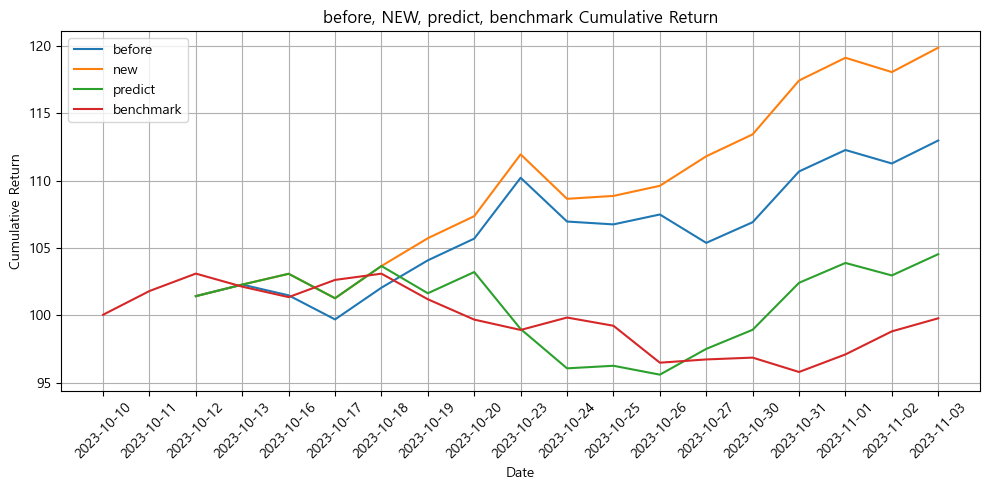

In [1558]:
# 포트폴리오 누적수익률 그래프
plt.figure(figsize=(10, 5))
plt.plot(VKOSPI_Label.index, VKOSPI_Label['return_cumprod'], label='before')
plt.plot(new.index, new['return_cumprod'], label='new')
plt.plot(predict.index, predict['predict_cumprod'], label='predict')
plt.plot(ks200.index, ks200['return_cumprod'], label='benchmark')
# plt.plot(VKOSPI_Label.index, VKOSPI_Label['return'], label='KOSPI')

# x축 레이블을 날짜로 설정합니다.
# plt.xticks(VKOSPI_Label.index, new.index)

plt.xticks(VKOSPI_Label.index[::int(len(VKOSPI_Label.index)/10)], rotation=45)
# , new.index[::int(len(new.index)/10)],
plt.title('before, NEW, predict, benchmark Cumulative Return')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

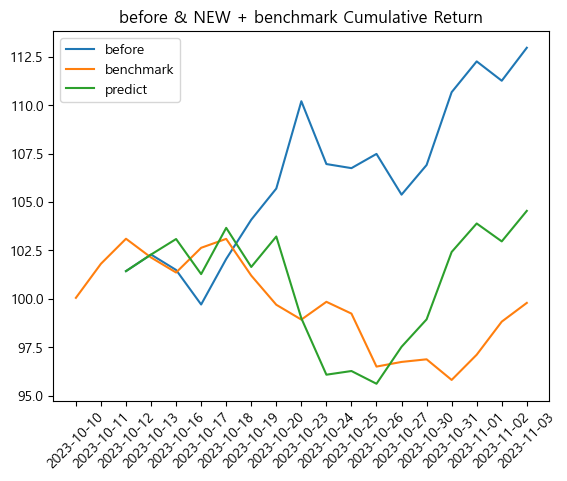

In [1559]:
import matplotlib.pyplot as plt

# Assuming you have three different dataframes: VKOSPI_Label, new, and predict

# Plot the first line with x-axis ticks
plt.plot(VKOSPI_Label.index, VKOSPI_Label['return_cumprod'], label='before')
plt.xticks(VKOSPI_Label.index[::int(len(VKOSPI_Label.index)/10)], rotation=45)

# Plot the second line with x-axis ticks
plt.plot(new.index, ks200['return_cumprod'], label='benchmark')
plt.xticks(new.index[::int(len(new.index)/10)], rotation=45)

# Plot the third line with x-axis ticks
plt.plot(predict.index, predict['predict_cumprod'], label='predict')
plt.xticks(predict.index[::int(len(predict.index)/10)], rotation=45)

plt.title('before & NEW + benchmark Cumulative Return')
plt.legend()
plt.show()

# 양매도, 양매수 스트랭글

In [1560]:
for i in range(len(VKOSPI_Label.index)):
    d = VKOSPI_Label.index[i] # 시점
    if VKOSPI_Label.loc[d, 'VKOSPI_Label'] == 0: # 변동성 하락 양매도 스트래들
        try:
            cost = 0
            cost += CTB9sp['S+4'].loc[d]
            cost += PTB9sp['S-4'].loc[d]
            VKOSPI_Label['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S+4'].loc[d]
            revenue += PTB15sp['S-4'].loc[d]
            VKOSPI_Label['revenue'].loc[d] = revenue
        except:
            VKOSPI_Label['cost'].loc[d] = np.nan
            VKOSPI_Label['revenue'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB9sp['S+4'].loc[d]
            cost += PTB9sp['S-4'].loc[d]
            VKOSPI_Label['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S+4'].loc[d]
            revenue += PTB15sp['S-4'].loc[d]
            VKOSPI_Label['revenue'].loc[d] = revenue
        except:
            VKOSPI_Label['cost'].loc[d] = np.nan
            VKOSPI_Label['revenue'].loc[d] = np.nan
VKOSPI_Label['profit'] = VKOSPI_Label['revenue'] - VKOSPI_Label['cost']
print(VKOSPI_Label)
print(VKOSPI_Label['profit'].sum())

            VKOSPI_Label  cost  revenue  profit    return  return_cumprod
날짜                                                                       
2023-10-10             1   NaN      NaN     NaN       NaN             NaN
2023-10-11             0   NaN      NaN     NaN       NaN             NaN
2023-10-12             0   NaN      NaN     NaN  0.014311      101.431127
2023-10-13             0   NaN      NaN     NaN  0.008439      102.287086
2023-10-16             1   NaN      NaN     NaN -0.007784      101.490839
2023-10-17             0   NaN      NaN     NaN -0.017588       99.705824
2023-10-18             0   NaN      NaN     NaN  0.023597      102.058577
2023-10-19             1   NaN      NaN     NaN  0.019876      104.087070
2023-10-20             1   NaN      NaN     NaN  0.015476      105.697941
2023-10-23             0   NaN      NaN     NaN  0.042683      110.209439
2023-10-24             0   NaN      NaN     NaN -0.029449      106.963834
2023-10-25             1   NaN      Na

# 버터플

In [1561]:
# for d in VKOSPI_Label.index:    
#     if VKOSPI_Label.loc[d, 'VKOSPI_Label'] == 0: # 변동성 하락 양매도 스트랭글
#         try:
#             cost = 0
#             cost -= CTB09sp['S-1'].loc[d]
#             cost -= CTB09sp['S+1'].loc[d]
#             cost += 2 * CTB09sp['기준행사가'].loc[d]
#             VKOSPI_Label['cost'].loc[d] = cost # 9시 값 합
#             revenue = 0
#             revenue += CTB15sp['S-1'].loc[d]
#             revenue += CTB15sp['S+1'].loc[d]
#             revenue -= 2 * CTB15sp['기준행사가'].loc[d]
#             VKOSPI_Label['revenue'].loc[d] = revenue # 15시 값 합
#             VKOSPI_Label['profit'].loc[d] = cost + revenue
#             # VKOSPI_Label['return'].loc[d] = (cost - revenue) / revenue
#         except:     
#             VKOSPI_Label['cost'].loc[d] = np.nan
#             VKOSPI_Label['revenue'].loc[d] = np.nan 
#             VKOSPI_Label['profit'].loc[d] = np.nan 
#             VKOSPI_Label['return'].loc[d] = np.nan
#     else: # label == 1 변동성 상승 양매수 스트래들
#         try:
#             VKOSPI_Label['cost'].loc[d] = np.nan
#             VKOSPI_Label['revenue'].loc[d] = np.nan
#             VKOSPI_Label['profit'].loc[d] = np.nan
#             VKOSPI_Label['return'].loc[d] = np.nan
#         except:
#             VKOSPI_Label['cost'].loc[d] = np.nan
#             VKOSPI_Label['revenue'].loc[d] = np.nan
#             VKOSPI_Label['profit'].loc[d] = np.nan
#             VKOSPI_Label['return'].loc[d] = np.nan